In [1047]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm
%matplotlib inline

In [1048]:
train = pd.read_csv('train.csv')

In [1049]:
test = pd.read_csv('test.csv')

In [1050]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [1051]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [1052]:
train_ID = train['Id']
test_ID = test['Id']

train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

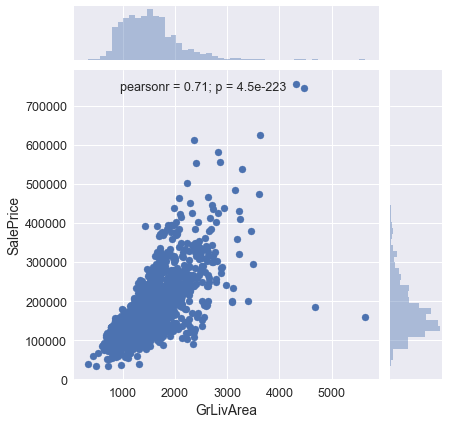

In [1053]:
sns.jointplot(x="GrLivArea", y="SalePrice", data=train)

From the descriptive thing:
    "There are 5 observations that an instructor may wish to remove from the data set before giving it to students (a plot of SALE PRICE versus GR LIV AREA will indicate them quickly). Three of them are true outliers (Partial Sales that likely don’t represent actual market values) and two of them are simply unusual sales (very large houses priced relatively appropriately)."

In [1054]:
# outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

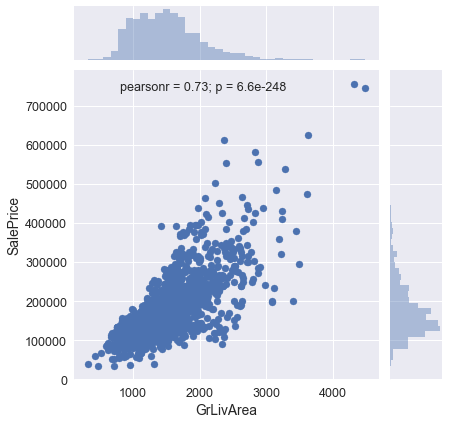

In [1055]:
#replotting
sns.jointplot(x ="GrLivArea", y="SalePrice", data=train)

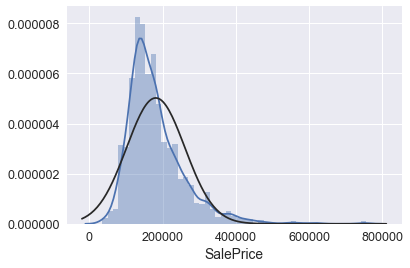

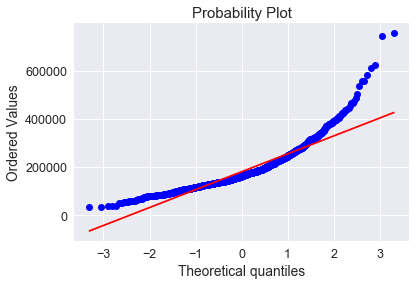

In [1056]:
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

In [1057]:
from sklearn import preprocessing
from scipy.stats import boxcox

In [1058]:
# correcting the skew and kurtosis on our SalePrice variable using BoxCox
train['SalePrice'] = preprocessing.scale(boxcox(train['SalePrice']+1)[0])

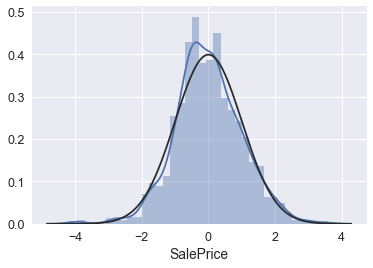

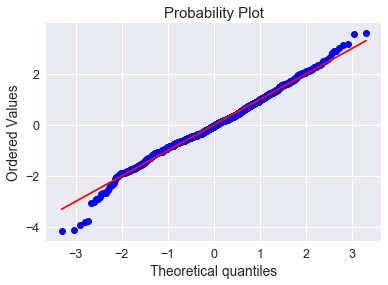

In [1059]:
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

In [1060]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
data = pd.concat((train, test)).reset_index(drop=True)
data.drop(['SalePrice'], axis=1, inplace=True)
print("data size is : {}".format(data.shape))

data size is : (2917, 79)


# Dealing with Missingness

In [1061]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(35)

,Total,Percent
PoolQC,2908,99.691464
MiscFeature,2812,96.400411
Alley,2719,93.212204
Fence,2346,80.425094
FireplaceQu,1420,48.680151
LotFrontage,486,16.660953
GarageFinish,159,5.450806
GarageQual,159,5.450806
GarageYrBlt,159,5.450806
GarageCond,159,5.450806


Missing Features:
    Alley: data desc says na means "no alley access"
    BsmtQual, BsmtCond, BsmntExposure, BsmtFinType1, BsmtFinType2: data desc says NA means "no basement"
    FireplaceQU: desc says NA means "No Fireplace"
    GarageType, GarageFinish,GaraGarageQual, GarageCond: desc says NA means "No Garage"
    PoolQC: desc says NA means "No Pool"
    Fence: desc says NA means "No Fence"
    MiscFeature: desc says NA means "None"

In [1062]:
data["Alley"] = data["Alley"].fillna("None")
data["BsmtQual"] = data["BsmtQual"].fillna("None")
data["BsmtCond"] = data["BsmtCond"].fillna("None")
data["BsmtExposure"] = data["BsmtExposure"].fillna("None")
data["BsmtFinType1"] = data["BsmtFinType1"].fillna("None")
data["BsmtFinType2"] = data["BsmtFinType2"].fillna("None")

In [1063]:
data["FireplaceQu"] = data["FireplaceQu"].fillna("None")
data["GarageType"] = data["GarageType"].fillna("None")
data["GarageFinish"] = data["GarageFinish"].fillna("None")
data["GarageQual"] = data["GarageQual"].fillna("None")
data["GarageCond"] = data["GarageCond"].fillna("None")
data["PoolQC"] = data["PoolQC"].fillna("None")
data["Fence"] = data["Fence"].fillna("None")
data["MiscFeature"] = data["MiscFeature"].fillna("None")

In [1064]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(8)

,Total,Percent
LotFrontage,486,16.660953
GarageYrBlt,159,5.450806
MasVnrType,24,0.822763
MasVnrArea,23,0.788481
MSZoning,4,0.137127
Functional,2,0.068564
Utilities,2,0.068564
BsmtFullBath,2,0.068564


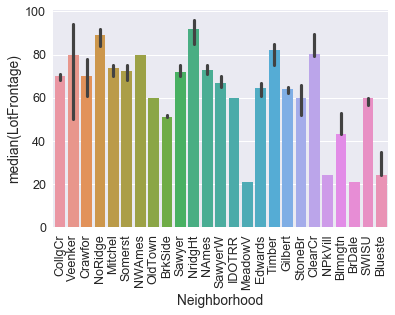

In [1065]:
sns.barplot(data=data,x='Neighborhood',y='LotFrontage', estimator=np.median)
plt.xticks(rotation=90)
plt.show()
plt.gcf().clear()

neighborhood seems a pretty good at determining lot frontage- using the mean neighborhood lot frontage to impute the missing lot frontages

In [1066]:
data["LotFrontage"] = data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [1067]:
data["GarageYrBlt"] = data["GarageYrBlt"].fillna(0)

most likely no basement so setting these basement measurements to zero

In [1068]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    data[col] = data[col].fillna(0)

Probably no masonry veneer for these houses so setting to 0 or none

In [1069]:
data["MasVnrType"] = data["MasVnrType"].fillna("None")
data["MasVnrArea"] = data["MasVnrArea"].fillna(0)

filling the 4 missing zoning's with residential- the most common seen zoning type

In [1070]:
data['MSZoning'] = data['MSZoning'].fillna(data['MSZoning'].mode()[0])

trying dropping utilities to see if this improves accuracy

In [1071]:
data = data.drop(['Utilities'], axis=1)

filling missing functional with most common type (typ)

In [1072]:
data['Functional'] = data['Functional'].fillna("Typ")

removing missing garage cars and area

In [1073]:
data['GarageCars'] = data['GarageCars'].fillna(0)
data['GarageArea'] = data['GarageArea'].fillna(0)

filling the remaining missing values by the most commonly seen value

In [1074]:
data['Exterior1st'] = data['Exterior1st'].fillna(data['Exterior1st'].mode()[0])
data['Exterior2nd'] = data['Exterior2nd'].fillna(data['Exterior2nd'].mode()[0])
data['KitchenQual'] = data['KitchenQual'].fillna(data['KitchenQual'].mode()[0])
data['SaleType'] = data['SaleType'].fillna(data['SaleType'].mode()[0])
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])

In [1075]:
data['Functional'] = data['Functional'].fillna(data['Functional'].mode()[0])

In [1030]:
data_corr = data.corr()

In [1031]:
data_corr

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
1stFlrSF,1.000000,-0.264402,0.045421,0.109621,0.434912,0.087414,0.251902,0.011884,0.301793,-0.065270,...,-0.157898,0.475793,0.084822,0.101633,0.384291,0.793231,0.227100,0.310916,0.241325,-0.013129
2ndFlrSF,-0.264402,1.000000,-0.032363,0.504121,-0.176209,-0.097397,-0.164034,-0.059874,-0.000622,0.055264,...,0.006241,0.242621,0.039280,0.011505,0.583146,-0.221260,0.088764,0.015896,0.157674,-0.018760
3SsnPorch,0.045421,-0.032363,1.000000,-0.048267,0.052823,-0.023289,0.027622,0.026861,-0.005746,-0.032849,...,0.043707,0.018962,-0.006248,-0.029567,-0.025628,0.039572,-0.003871,0.016050,0.037530,0.022546
BedroomAbvGr,0.109621,0.504121,-0.048267,1.000000,-0.117034,-0.031078,-0.155902,0.018719,0.183621,0.049985,...,-0.008419,0.072945,0.036921,0.007288,0.671781,0.054705,0.031546,-0.053267,-0.022054,-0.020428
BsmtFinSF1,0.434912,-0.176209,0.052823,-0.117034,1.000000,-0.054784,0.643268,0.081903,-0.489401,-0.100226,...,-0.049402,0.275192,0.034008,0.100981,0.035853,0.511606,0.224491,0.280691,0.150461,0.023302
BsmtFinSF2,0.087414,-0.097397,-0.023289,-0.031078,-0.054784,1.000000,0.163656,0.099485,-0.238023,0.032705,...,0.041262,-0.042160,0.047350,0.063275,-0.047772,0.093696,0.098680,-0.027281,-0.061760,0.008823
BsmtFullBath,0.251902,-0.164034,0.027622,-0.155902,0.643268,0.163656,1.000000,-0.148567,-0.398428,-0.067790,...,-0.042190,0.161887,0.031303,0.053760,-0.044155,0.321871,0.185510,0.210636,0.133852,0.045300
BsmtHalfBath,0.011884,-0.059874,0.026861,0.018719,0.081903,0.099485,-0.148567,1.000000,-0.106810,-0.009675,...,0.083833,-0.040151,0.070197,0.042069,-0.049258,0.014556,0.051840,-0.029981,-0.045994,-0.020095
BsmtUnfSF,0.301793,-0.000622,-0.005746,0.183621,-0.489401,-0.238023,-0.398428,-0.106810,1.000000,0.005225,...,-0.138625,0.275916,-0.032245,-0.048975,0.248475,0.423859,-0.039133,0.130660,0.165662,-0.037918
EnclosedPorch,-0.065270,0.055264,-0.032849,0.049985,-0.100226,0.032705,-0.067790,-0.009675,0.005225,1.000000,...,0.070928,-0.138945,0.097220,-0.064452,0.016197,-0.085422,-0.118926,-0.373978,-0.220283,-0.001189


In [1098]:
sns.jointplot(x=YrSold, y= SalePrice, data=train)

NameError: name 'YrSold' is not defined

transforming year and month into categorical features

In [1076]:
data['YrSold'] = data['YrSold'].astype(str)
data['MoSold'] = data['MoSold'].astype(str)

gonna try putting overall condition as categorical

In [1077]:
data['OverallCond'] = data['OverallCond'].astype(str)

MSSubClass should be categorical as well

In [1078]:
data['MSSubClass'] = data['MSSubClass'].astype(str)

overall SF? we have TotalBsmtSF, 1stFlrSF and 2ndFlrSF
might be worth putting them together into a "overall SF"category?

In [1079]:
data['OverallSF'] = data['1stFlrSF'] + data['2ndFlrSF'] + data['TotalBsmtSF']

# Figuring out what to do with Nominal & Ordinal Categories

According to the Data Documentation this is the breakdown on the Nominal and Ordinal Categories- 1st attempt I just used .get_dummies() on everything, but that gave:
Lasso score: 0.2779 (0.0385), which is, well, terrible so going to try and convert the ordinal categories. 
Right, so after this change i got Lasso score: 0.2790 (0.0380), which has lower standard deviation, but higher mean score. well crappers. running the changes to ordinal categories before adjusting for skew i got Lasso score: 0.2811 (0.0381) so that's worse again. hahahahaha. *cries*. not running the skew adjustment for any of the independent variables i got Lasso score: 0.2850 (0.0407). removing utilities gave me Lasso score: 0.2805 (0.0374). with adding some more nominals to the Label encoder i got Lasso score: 0.2900 (0.0219), which is less standard deviation which might be good?

Nomial categories

"MSSubClass", MSZoning, "Street", "Alley", LandContour, LotConfig, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1, Exterior2, MasVnrType, MasVnrArea, Foundation, Heating, "CentralAir", GarageType, MiscFeature, SaleType, SaleCondition

Ordinal Categories

LotShape, Utilities, LandSlope, OverallQual, OverallCond, ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, HeatingQC, Electrical, KitchenQual, Functional, FireplaceQu, GarageFinish, GarageQual, GarageCond, PavedDrive, PoolQC, Fence

this time i'm going to try converting the ordinal categories with label encoding. It looks like it basically factorizes the values

In [1036]:
from sklearn.preprocessing import LabelEncoder
category = ('LotShape', 'LandSlope', 'OverallCond', 'ExterQual', 'ExterCond', 
            'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
            'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish',
            'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'OverallCond', 
            'YrSold', 'MoSold', 'Street', 'Alley', 'CentralAir', 'MSSubClass')

for c in category:
    lbl = LabelEncoder()
    lbl.fit(list(data[c].values))
    data[c] = lbl.transform(list(data[c].values))

In [1037]:
data.groupby("LotShape").count()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,OverallSF
LotShape,,,,,,,,,,,,,,,,,,,,,
0,967,967,967,967,967,967,967,967,967,967,...,967,967,967,967,967,967,967,967,967,967
1,76,76,76,76,76,76,76,76,76,76,...,76,76,76,76,76,76,76,76,76,76
2,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
3,1859,1859,1859,1859,1859,1859,1859,1859,1859,1859,...,1859,1859,1859,1859,1859,1859,1859,1859,1859,1859


gonna try rerunning the boxcox with these Label Encoded Values

# Skewness

In [1080]:
numerical = data.dtypes[data.dtypes != "object"].index

In [1081]:
skewed = data[numerical].apply(lambda x: x.skew()).sort_values()

In [1082]:
skewed

GarageYrBlt      -3.906642
YearBuilt        -0.599503
YearRemodAdd     -0.450365
GarageCars       -0.219410
FullBath          0.165599
OverallQual       0.189688
GarageArea        0.216968
BedroomAbvGr      0.326736
BsmtFullBath      0.622735
TotalBsmtSF       0.672097
HalfBath          0.697024
Fireplaces        0.725651
TotRmsAbvGrd      0.749618
2ndFlrSF          0.861999
BsmtUnfSF         0.920161
BsmtFinSF1        0.981149
OverallSF         1.009676
GrLivArea         1.069300
LotFrontage       1.103606
1stFlrSF          1.257933
WoodDeckSF        1.845741
OpenPorchSF       2.530660
MasVnrArea        2.623068
BsmtHalfBath      3.932018
ScreenPorch       3.947131
EnclosedPorch     4.004404
BsmtFinSF2        4.146636
KitchenAbvGr      4.302763
3SsnPorch        11.377932
LowQualFinSF     12.090757
LotArea          13.116240
PoolArea         17.697766
MiscVal          21.950962
dtype: float64

allright, a lot of these are incredibly skewed- talking with YuHan it sounded like we'd be good to use boxcox on these 

In [1083]:
skewdf = pd.DataFrame({'Skew': skewed})
skewdf.head(3)

,Skew
GarageYrBlt,-3.906642
YearBuilt,-0.599503
YearRemodAdd,-0.450365


In [1084]:
skewdf = skewdf[abs(skewdf)>0.75]
from scipy.special import boxcox1p
skewed = skewdf.index
lam = 0.15
for feat in skewed:
    data[feat] = boxcox1p(data[feat], lam)

In [1085]:
newskewed = data[numerical].apply(lambda x: x.skew()).sort_values()

In [1086]:
newskewed

TotalBsmtSF      -3.987517
GarageYrBlt      -3.925767
GarageArea       -3.046366
BsmtUnfSF        -1.538077
GarageCars       -1.106936
LotFrontage      -0.799316
BedroomAbvGr     -0.753856
YearBuilt        -0.621941
OverallQual      -0.489180
BsmtFinSF1       -0.489117
YearRemodAdd     -0.456434
OverallSF        -0.208110
FullBath         -0.180186
OpenPorchSF       0.099432
GrLivArea         0.130118
TotRmsAbvGrd      0.135559
LotArea           0.177826
1stFlrSF          0.179210
WoodDeckSF        0.224297
Fireplaces        0.285457
2ndFlrSF          0.329048
BsmtFullBath      0.442015
HalfBath          0.592853
MasVnrArea        0.637716
EnclosedPorch     2.025363
BsmtFinSF2        2.564554
ScreenPorch       2.978584
KitchenAbvGr      3.699206
BsmtHalfBath      3.788634
MiscVal           5.597842
LowQualFinSF      8.745528
3SsnPorch         8.926241
PoolArea         15.767638
dtype: float64

In [1087]:
data = pd.get_dummies(data)

In [1088]:
data.shape

(2917, 338)

Re-separating the data into test and train

In [1089]:
train = data[:ntrain]
test = data[ntrain:]

# Running the Models

In [1090]:
# Load libraries
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

In [1102]:
n_folds = 10

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=1).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)


In [1103]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.00099, random_state=1))

In [1104]:
score = rmsle_cv(lasso)
print("Lasso score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Lasso score: 0.2758 (0.0376)


WHYYYYYY isn't this betterrrrrrrr!!!!!

In [1045]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=1))

In [1094]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

/Users/bdbrunson/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ElasticNet score: 0.2786 (0.0385)


ok so my scores are terrible, i'm probably going to need to go back and mess with the data classifications